In [1]:
%matplotlib inline
from __future__ import print_function, division
import os
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import cPickle as Pickle
from IPython.display import display

In [2]:
os.chdir('/home/wryang/CApest/')
CON_STR = Pickle.load(open('constring.p', 'r'))

In [3]:
def plot_lm_one(data, *args):
    fig = plt.figure(figsize = (8, 5))
    ax = plt.subplot(111)
    print ('input chem names', args[0])
    for k, item in enumerate(args[0]):
        subdf = None
        subdf = data[data.chem==item]
        if len(subdf.year) != len(range(1990, 2016)):
            missing_years = list(set(data.year) - set(subdf.year))
            temp = pd.DataFrame({'year': missing_years, 
                     'chem':[item]*len(missing_years), 
                     'kg':[0]*len(missing_years)})
            subdf = pd.concat([subdf, temp])
            subdf = subdf.sort_values(by='year', axis=0)
        ax.plot(subdf.year, subdf.kg, color = np.random.rand(3,1), label=item)
    plt.title('Direct sum from all pur data')
    ax.legend(loc=2, bbox_to_anchor=(1.05, 1),  shadow=True, ncol=1)
#     ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
    plt.show()

In [4]:
# data trimmed and all rows with unformatted comtrs, field id, and grow id were removed
tables2query = ['lynn.udc_direct_all', 'lynn.year_chem_trim_uc_final', 'lynn.year_chem_trim_final'] 
qstrings = ["""SELECT year, chem_grp, sum(kg) 
        FROM {} y 
        INNER JOIN lynn.chemlist c ON y.ai_cd = c.ai_cd
        GROUP BY year, chem_grp
        ORDER BY year, chem_grp;""".format(s) for s in tables2query ] 

print ('--query string for the direct sum table:\n-----\n', qstrings[0])

--query string for the direct sum table:
-----
 SELECT year, chem_grp, sum(kg) 
        FROM lynn.udc_direct_all y 
        INNER JOIN lynn.chemlist c ON y.ai_cd = c.ai_cd
        GROUP BY year, chem_grp
        ORDER BY year, chem_grp;


In [5]:
def getDfs(q_string):
    """
    INPUT: STRING, STRING (Query Script, Connect Info)
    OUTPUT: DATAFRAME (Pandas dataframe)
    """
    conn = psycopg2.connect(CON_STR)
    cur = conn.cursor()
    cur.execute(q_string)
    rows = cur.fetchall()
    df = pd.DataFrame(rows, columns=['year','chem', 'kg'])
    conn.close()
    return df
    
def plt_compare(dfs, plotheaders, chems):
    """
    INPUT: LIST OF PANDAS DF, LIST OF STRING, STRING
    OUTPUT: NONE/ SAVE PLOT
    # Take a list of dataframe, a list of output plot title, and a chem name
    """
    for i, chem in enumerate(chems):
        nCols = len(dfs)
        fig, axs = plt.subplots(1, 3, sharey=False, figsize = (18, 5))
        for k, ax in enumerate(axs):
            sdf = None
            sdf = dfs[k][dfs[k].chem==chem]
            if len(sdf.year) != len(range(1990, 2016)):
                missing_years = list(set(range(1990, 2016)) - set(sdf.year))
                temp = pd.DataFrame({'year': missing_years, 
                         'chem':[chem]*len(missing_years), 
                         'kg':[0]*len(missing_years)})
                sdf = pd.concat([sdf, temp])
            sdf = sdf.sort_values(by='year', axis=0)

            #plot one chem
            ax.plot(sdf.year, sdf.kg, color='#4167f4')

            # fit regression line
            m, b = np.polyfit(sdf.year, sdf.kg, 1)      
            ax.plot(sdf.year, m*sdf.year + b, '-', color='#f4416e')

            ax.set_title('--'.join([chem, plotheaders[k]]))
        print(i+1, '--', chem)
        plt.show()
        fig.savefig(chem +'.png')

1 -- 1,3-Dichloropropene


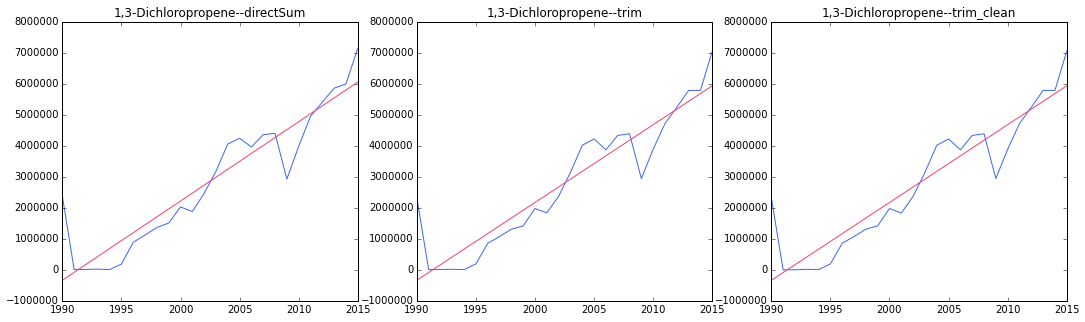

2 -- 2-4-D


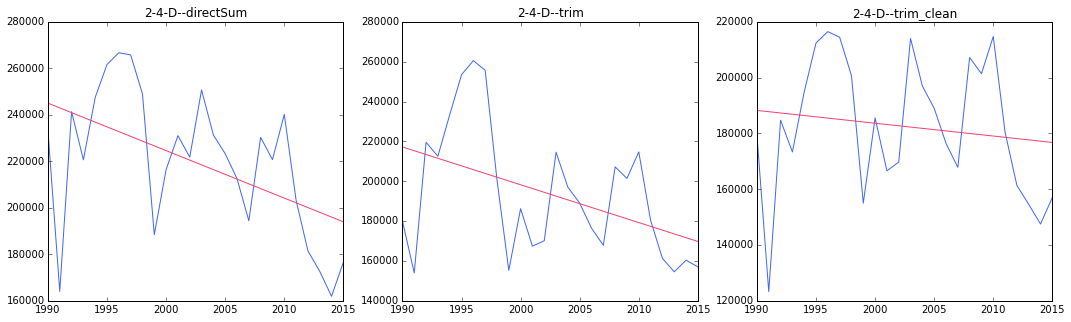

3 -- ABAMECTIN


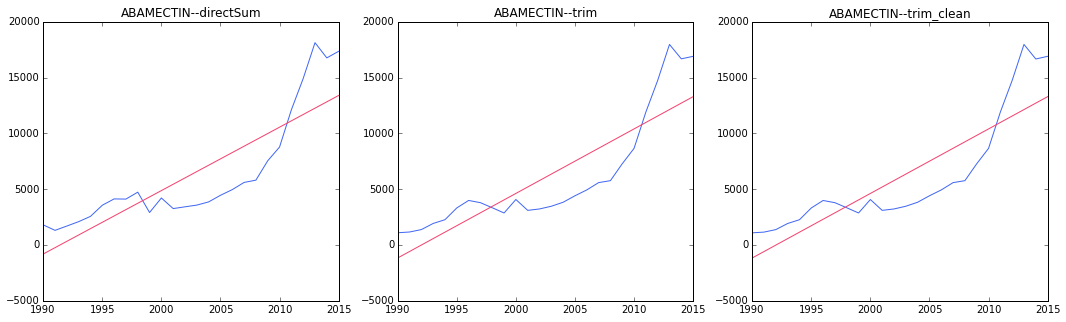

4 -- ACROLEIN


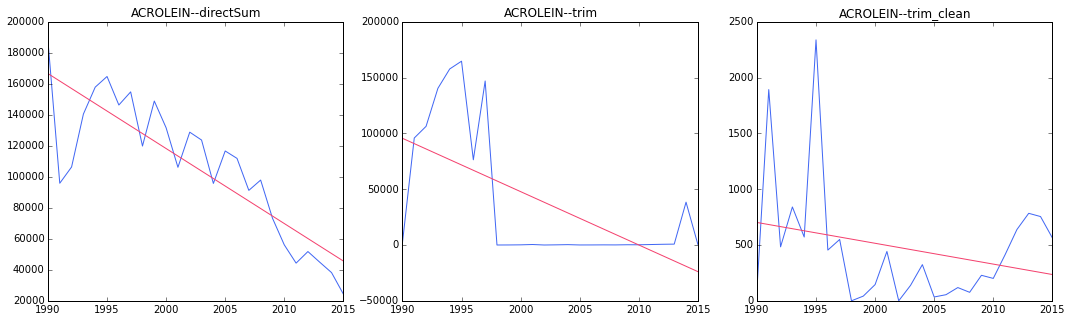

5 -- ALDICARB


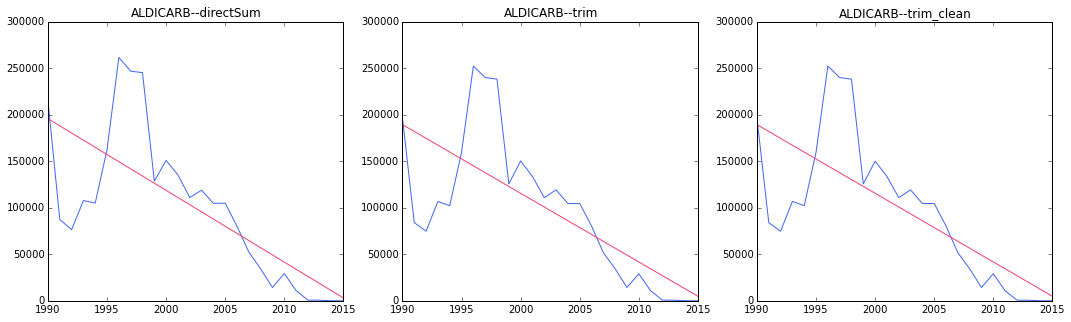

6 -- ATRAZINE


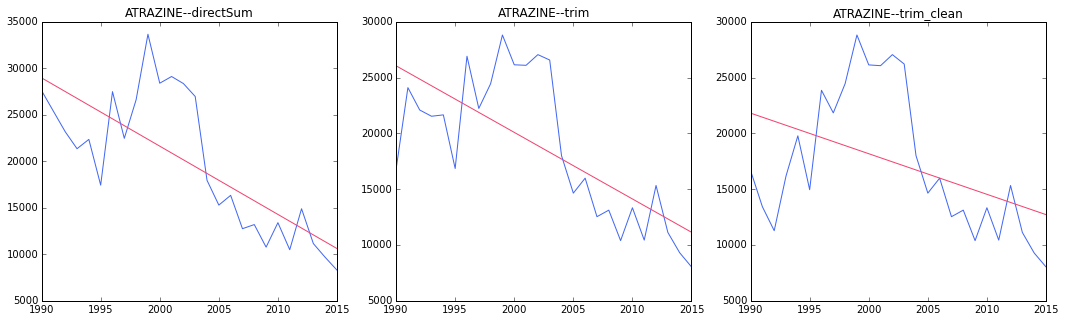

7 -- BROMACIL


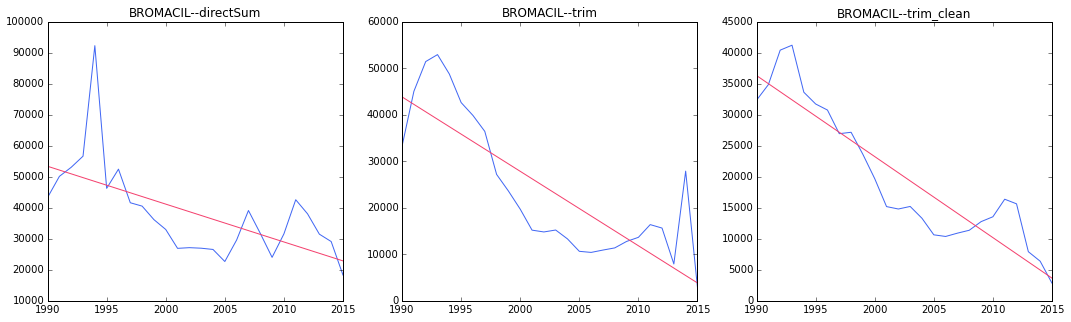

8 -- CAPTAN


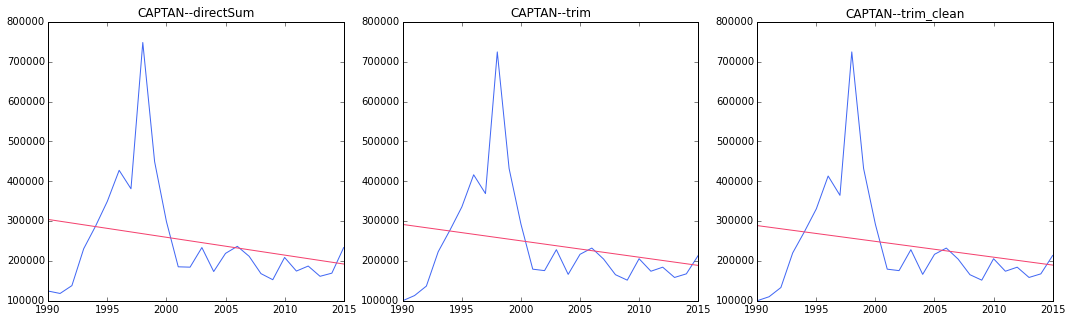

9 -- CARBOFURAN


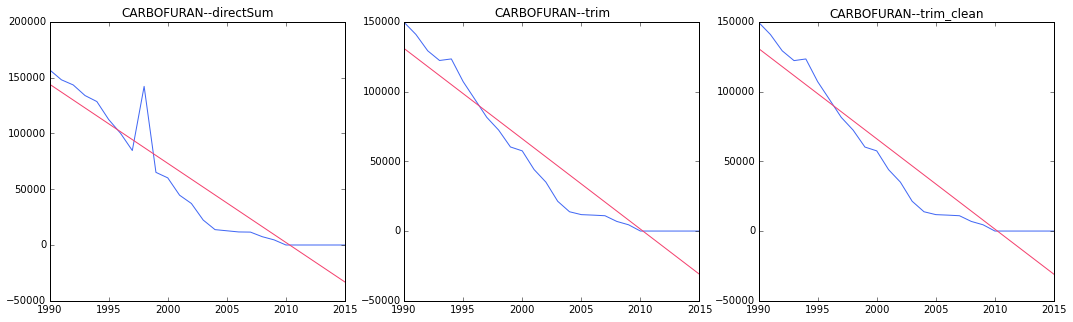

10 -- CARBRYL


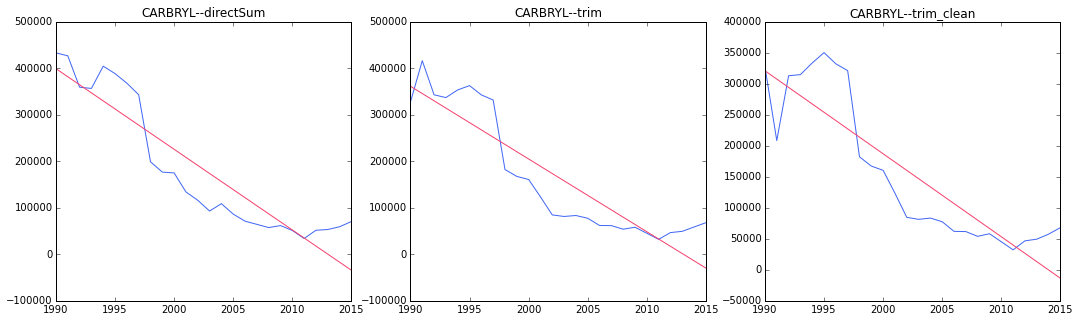

11 -- CHLOROPICRIN


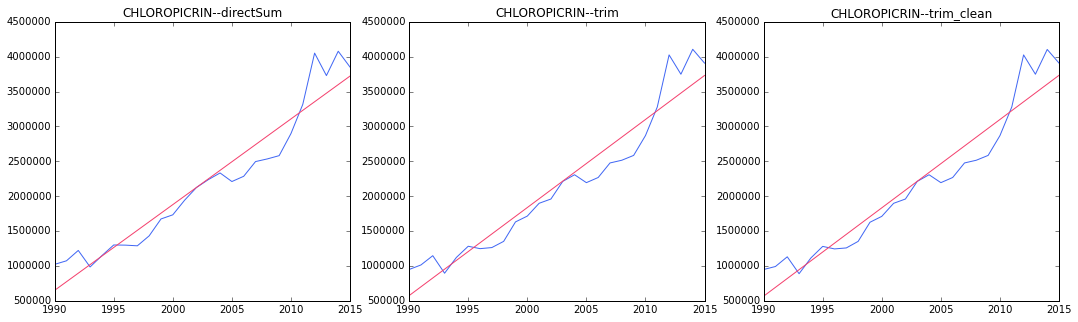

12 -- CHLOROTHALONIL


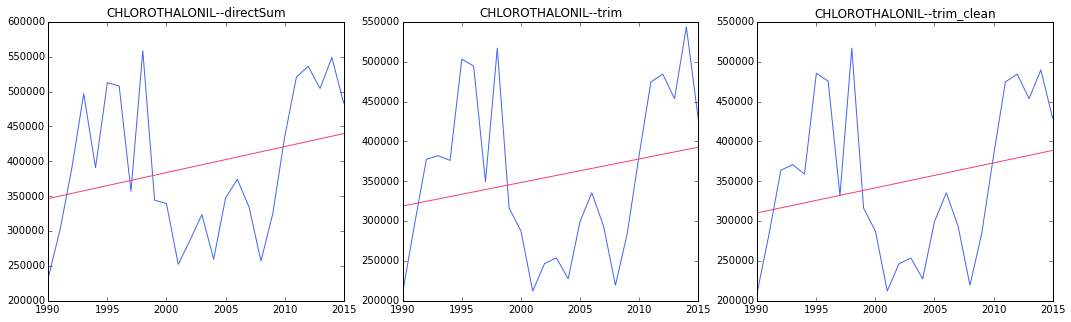

13 -- CHLORPYRIFOS


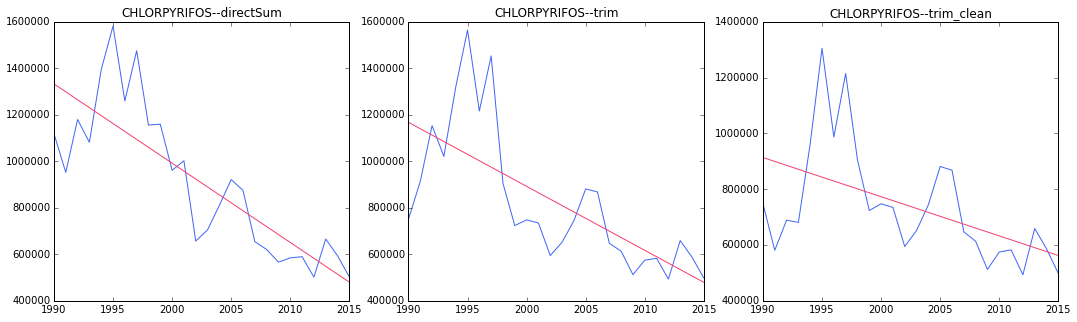

14 -- CYANAZINE


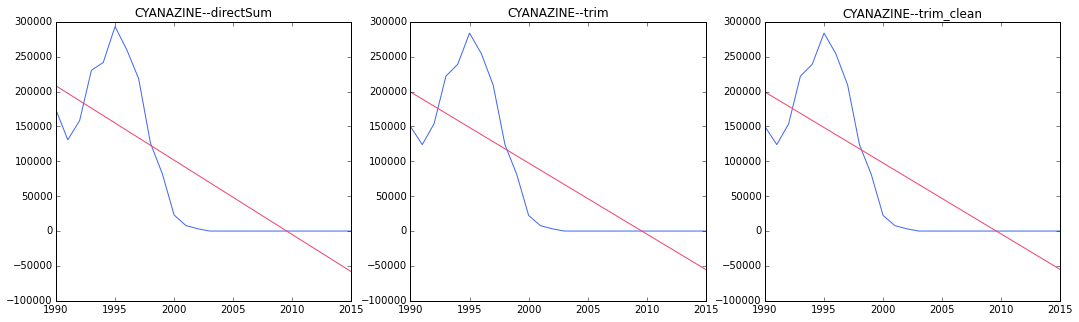

15 -- CYCLOATE


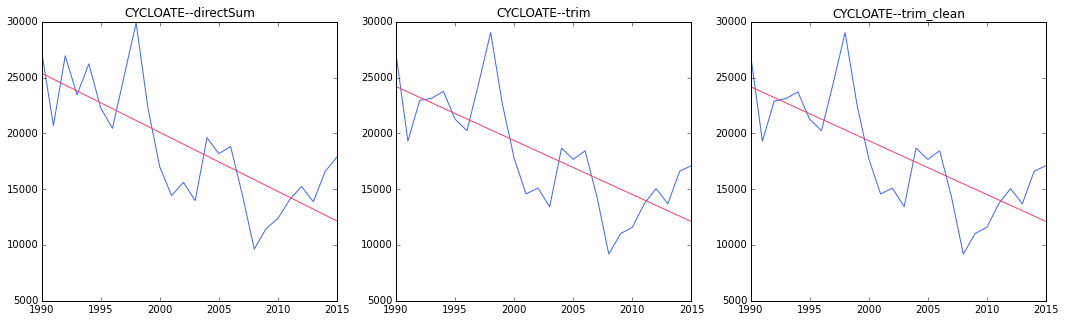

16 -- DAZOMET


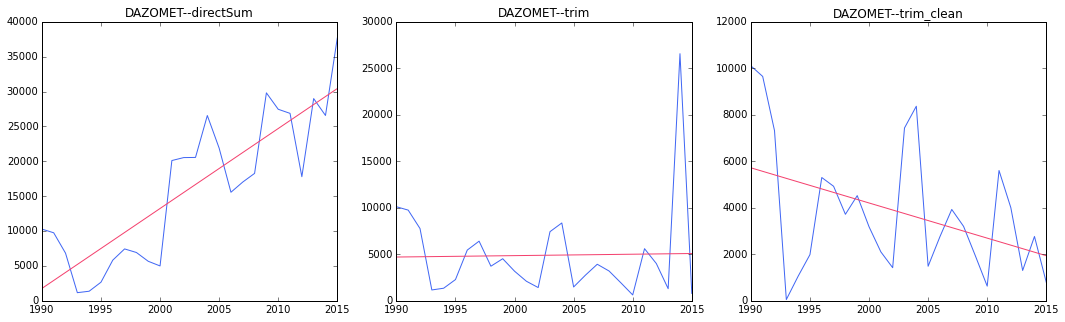

17 -- DIURON


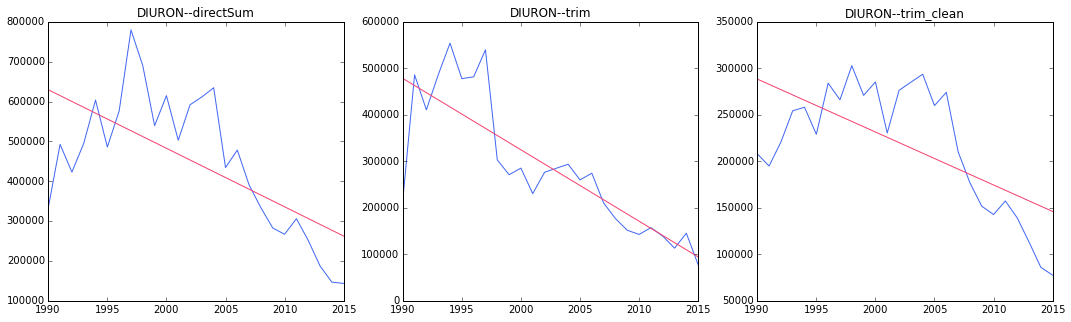

18 -- ENDOSULFAN


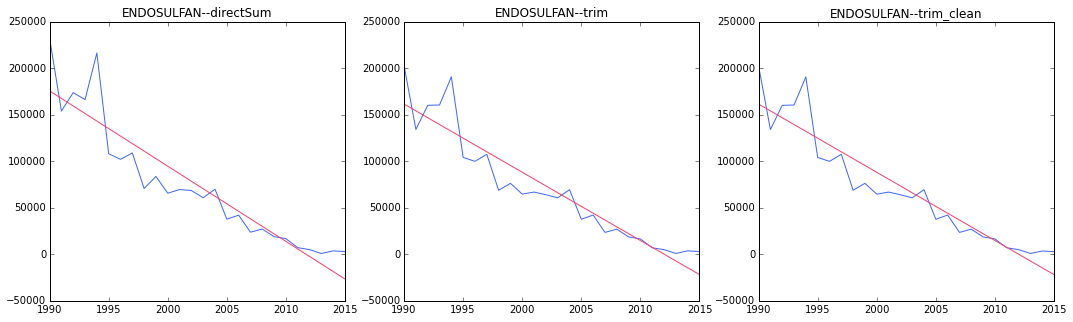

19 -- EPTC


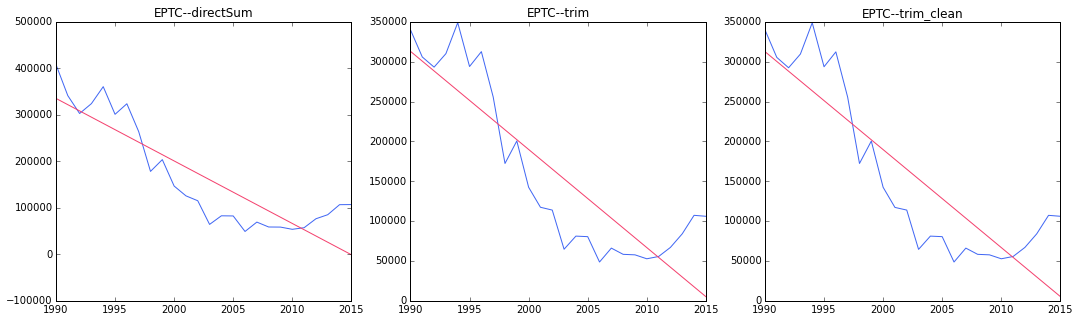

20 -- ETHOPROP


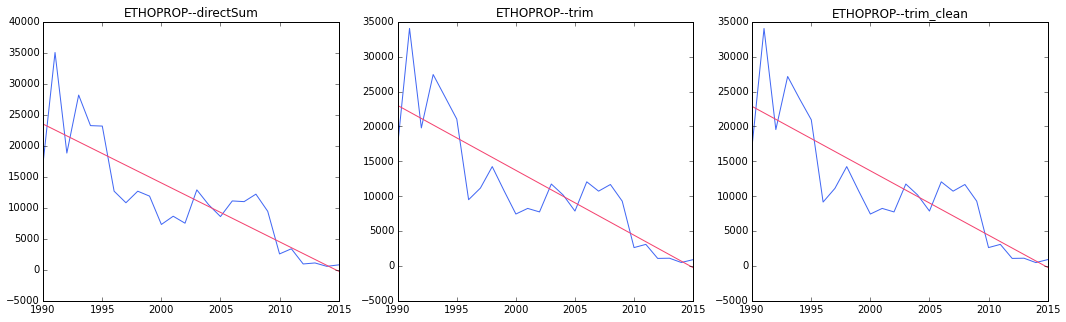

21 -- METAM-SODIUM


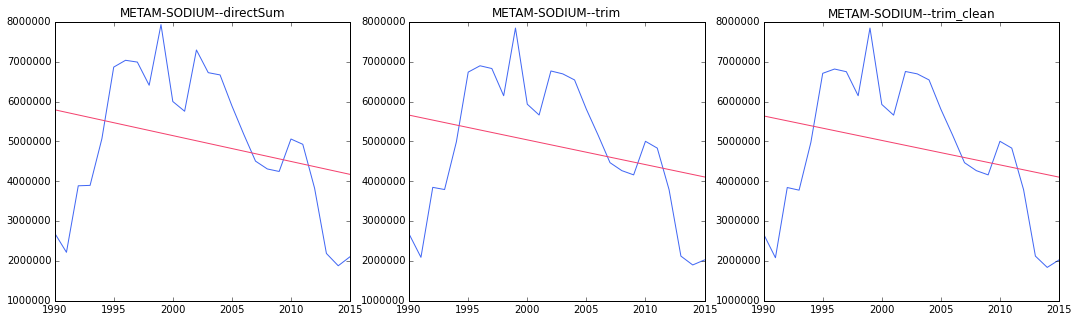

22 -- METHYL BROMIDE


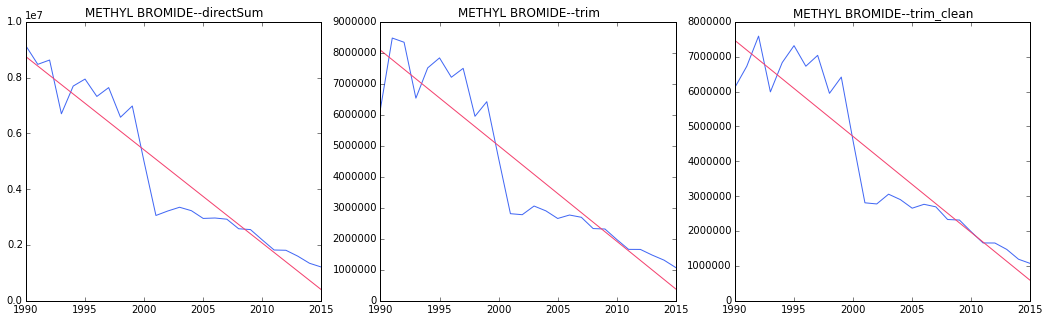

23 -- OP


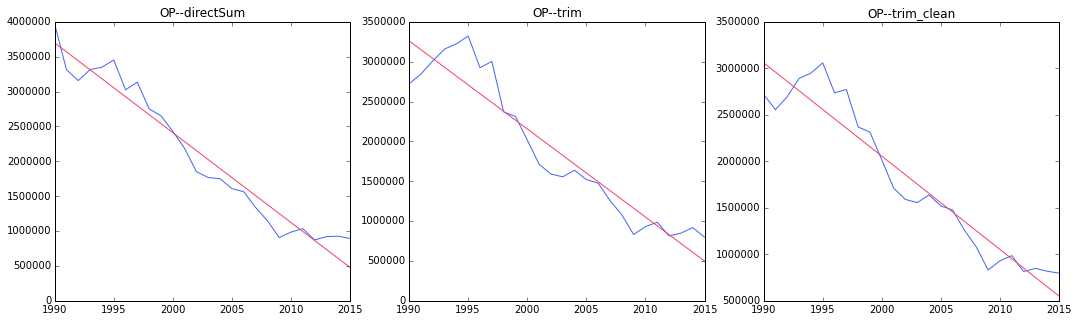

24 -- ORYZALIN


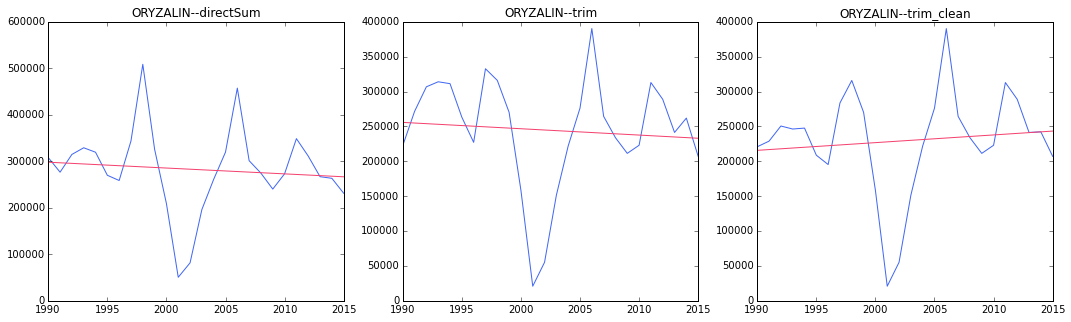

25 -- OXAMYL


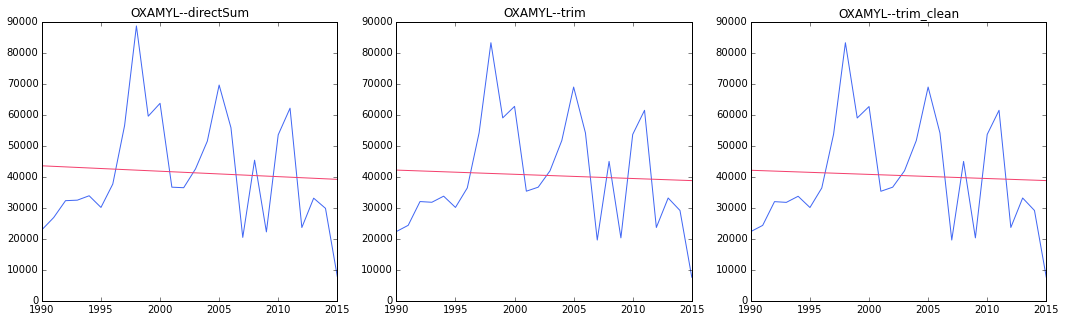

26 -- PCNB


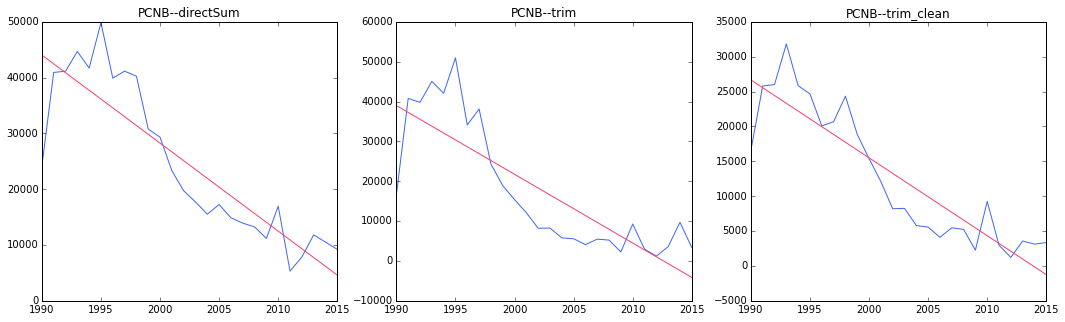

27 -- PROPARGITE


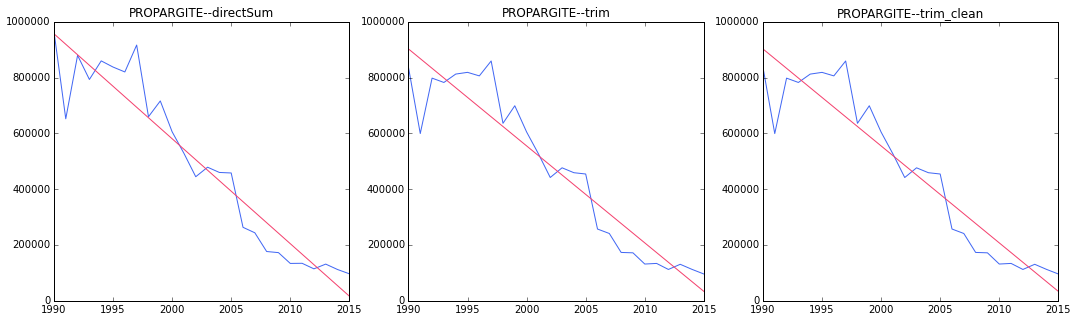

28 -- PROPYZAMIDE


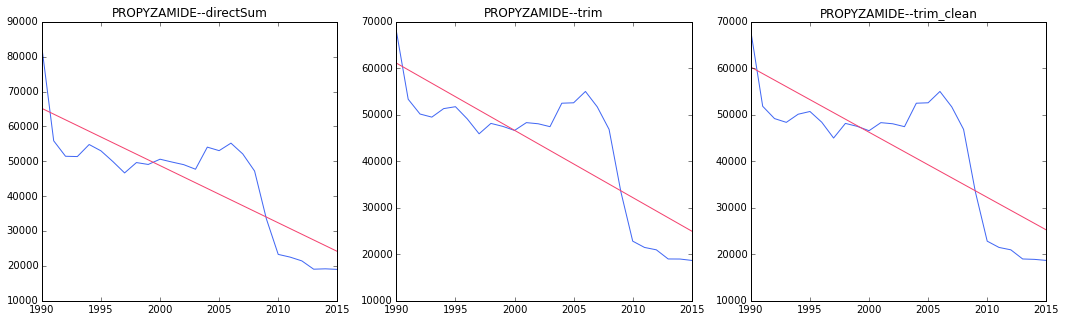

29 -- SIMAZINE


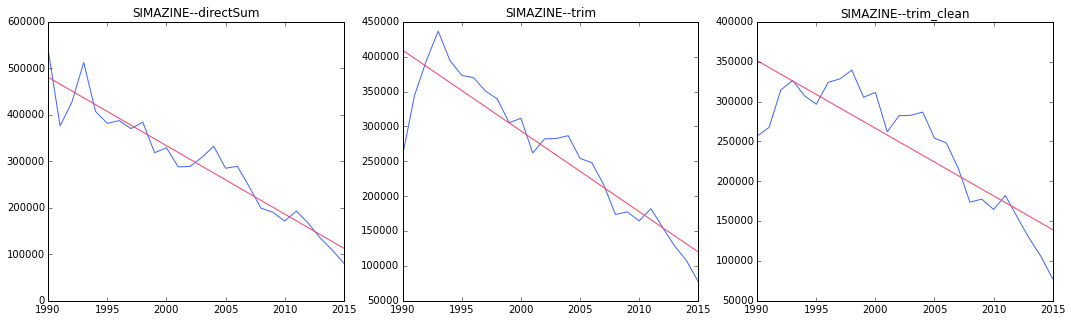

30 -- SODIUM TETRATHIOCARBONATE


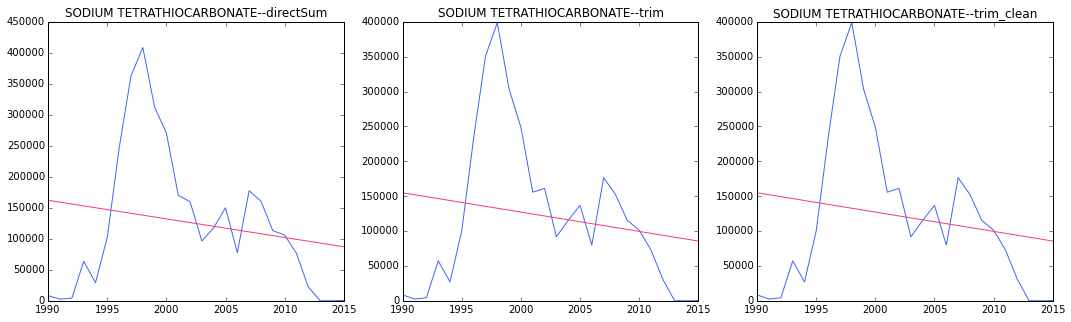

31 -- THIOBENCARB


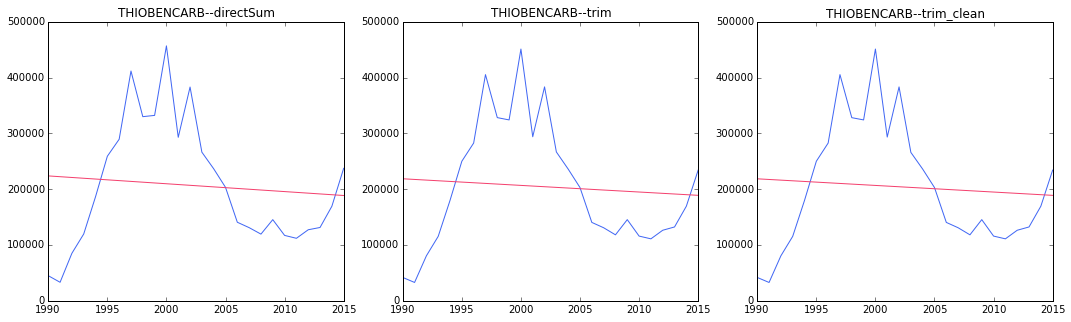

32 -- TRIFLURALIN


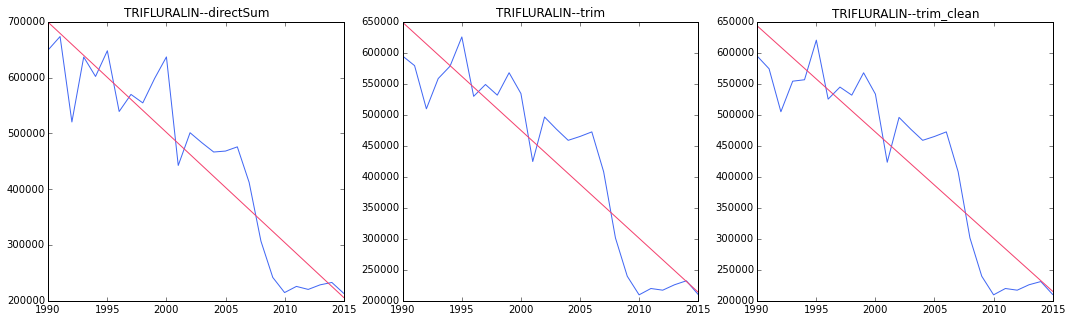

33 -- XADIAZON


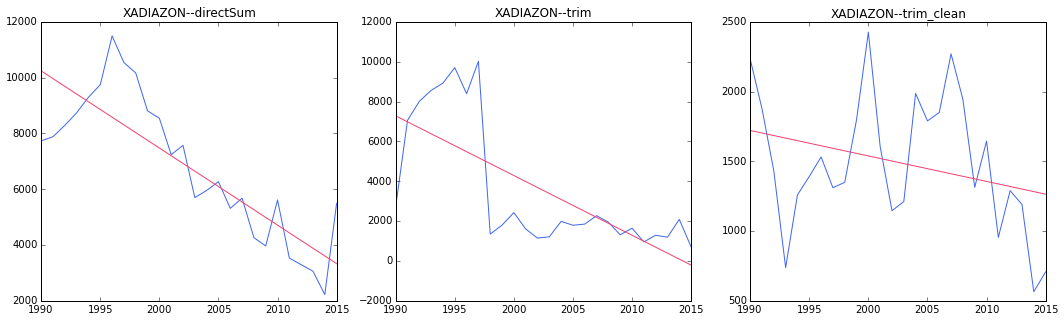

34 -- SODIUM DIMETHYL DITHIO CARBAMATE


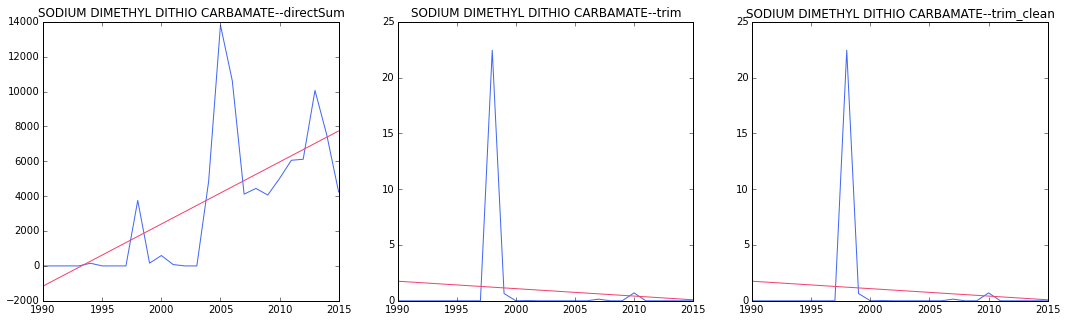

35 -- IMIDACLOPRID


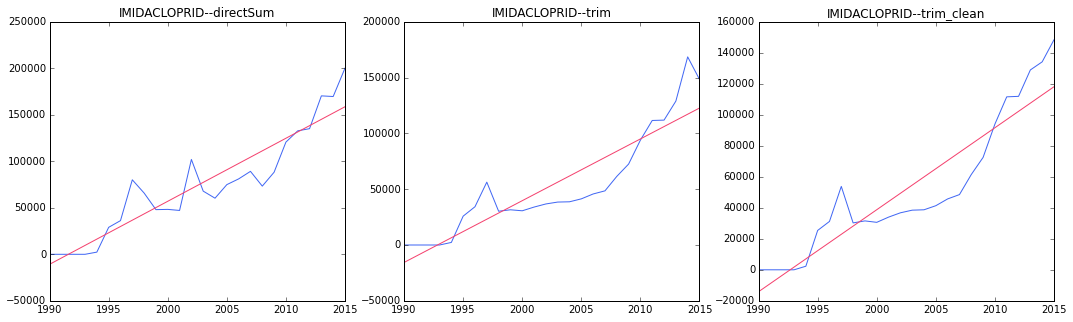

36 -- DINOTEFURAN


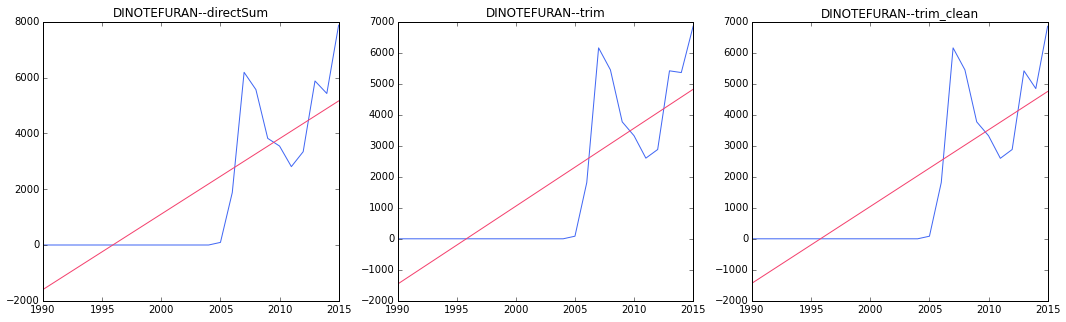

In [6]:
dfs = [getDfs(q) for q in qstrings]
# print(display('head of directsum table', dfs[0].head()))
plotheaders = ['directSum','trim','trim_clean']
chems = dfs[0]['chem'].unique()
plt_compare(dfs, plotheaders, chems)

# Multiple chemicals on a plot

In [7]:
lst01 = ['Methyl bromide', '1,3-Dichloropropene', 'Chloropicrin', 
        'Metam sodium', 'Metam potassium', 'dazomet']
lst01 = [x.upper() for x in lst01]

input chem names ['METHYL BROMIDE', '1,3-DICHLOROPROPENE', 'CHLOROPICRIN', 'METAM SODIUM', 'METAM POTASSIUM', 'DAZOMET']


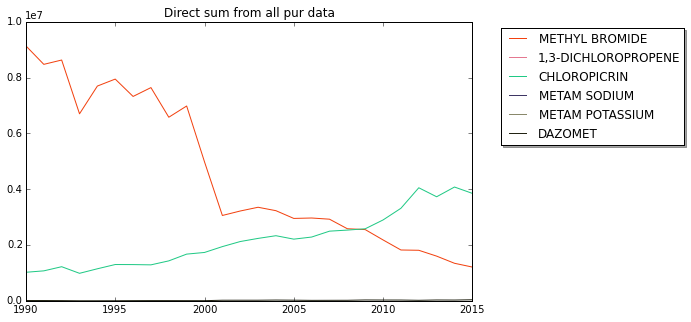

In [8]:
plot_lm_one(dfs[0], lst01)

input chem names ['METHYL BROMIDE', '1,3-DICHLOROPROPENE', 'CHLOROPICRIN', 'METAM SODIUM', 'METAM POTASSIUM', 'DAZOMET']


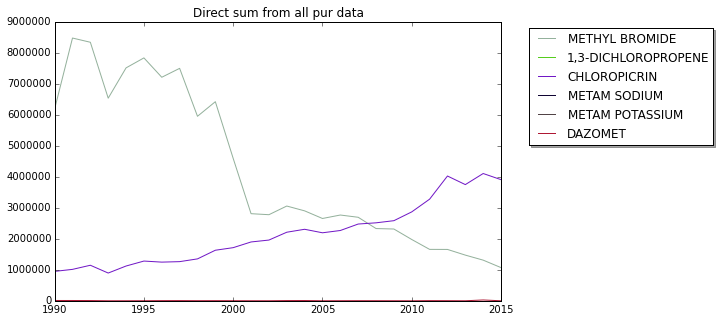

In [9]:
plot_lm_one(dfs[1], lst01)

input chem names ['METHYL BROMIDE', '1,3-DICHLOROPROPENE', 'CHLOROPICRIN', 'METAM SODIUM', 'METAM POTASSIUM', 'DAZOMET']


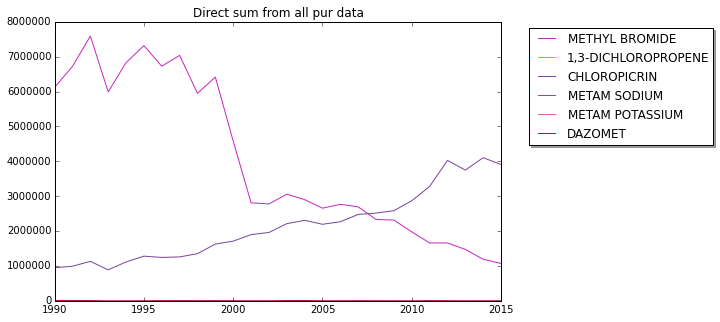

In [10]:
plot_lm_one(dfs[2], lst01)